In [53]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
import numba

image = io.imread('/home/vacilo/github/natural_artificial_vision/southern_ring_nebula.png')
baboon = io.imread('/home/vacilo/github/natural_artificial_vision/baboon.tiff')

In [54]:
#checking img shape
if image.ndim == 2:
    image_matrix = np.array(image)
elif image.ndim == 3:
    image_matrix = np.array(image)

print('Shape of the matrix:', image_matrix.shape)
print('Image matrix:')
print(image_matrix)

Shape of the matrix: (720, 770, 4)
Image matrix:
[[[  8   7   6 220]
  [ 10   6   5 237]
  [  7   5   5 237]
  ...
  [  6   6   6 237]
  [  6   6   6 237]
  [  6   6   6 237]]

 [[  7   6   6 242]
  [  7   6   5 255]
  [  9   5   4 255]
  ...
  [  6   6   5 255]
  [  6   6   5 255]
  [  6   6   5 255]]

 [[  9   6   6 237]
  [  8   6   6 255]
  [  7   6   5 255]
  ...
  [  6   6   5 255]
  [  6   6   5 255]
  [  6   6   5 255]]

 ...

 [[  6   6   6 237]
  [  6   6   7 255]
  [  7   7   7 255]
  ...
  [  3   3   3 255]
  [  4   4   4 255]
  [  3   3   4 255]]

 [[  7   7   7 242]
  [  7   7   7 255]
  [  8   8   9 255]
  ...
  [  3   4   4 255]
  [  4   3   4 255]
  [  3   3   4 255]]

 [[  7   8   8 220]
  [  7   7   7 237]
  [  7   7   8 237]
  ...
  [  3   3   4 237]
  [  2   4   4 237]
  [  3   4   5 237]]]


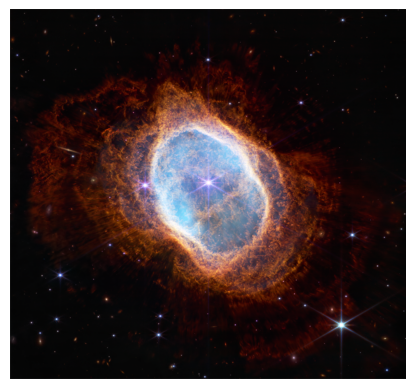

In [55]:
#plotting original img
plt.imshow(image)
plt.axis('off')
plt.show()

In [56]:
#turning img into gray
if image.shape[2] == 4:
    gray_img = color.rgb2gray(image[:,:,:3]) * image[:,:,3]
else:
    gray_img = color.rgb2gray(image)


(-0.5, 769.5, 719.5, -0.5)

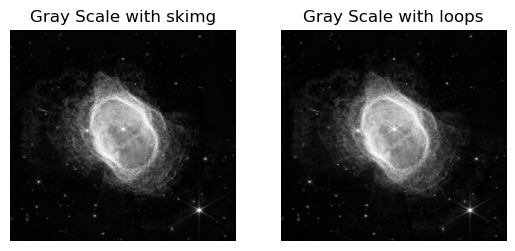

In [57]:
#turning img into gray by hand
height, width, channel = image.shape

gray_img_2 = np.zeros((height,width))

for i in range(height):
    for j in range(width):
        R = image[i,j,0]
        G = image[i,j,1]
        B = image[i,j,2]

        gray_img_2[i,j] = (1/3)*R + (1/3)*G + (1/3)*B


plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title('Gray Scale with skimg')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_img_2, cmap='gray')
plt.title('Gray Scale with loops')
plt.axis('off')

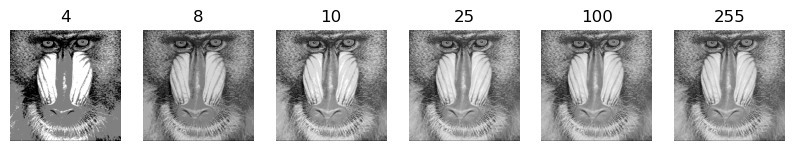

In [65]:
#testing different gray scales
levels_gray = [4, 8, 10, 25, 100, 255]

heightb, widthb, channelb = baboon.shape

different_gray_levels = np.zeros((heightb, widthb,len(levels_gray)), dtype=np.uint8)


for w in range(0, len(levels_gray)):
    different_gray_levels[:,:,w] = levels_gray[w]


for i in range(heightb):
    for j in range(widthb):
        R = baboon[i,j,0]
        G = baboon[i,j,1]
        B = baboon[i,j,2]

        current_gray = (1/3)*R + (1/3)*G + (1/3)*B
            
        #to account number of levels
        for k in range(0, len(levels_gray)):
            account_levels = int(current_gray/255 *(levels_gray[k] - 1)) * (255 // (levels_gray[k] - 1))
            different_gray_levels[i,j,k] = account_levels

if (different_gray_levels[:,:,1].all == different_gray_levels[:,:,3].all):
    print('paia')


plt.figure(figsize=(10,5))

for z in range(0, len(levels_gray)):
    plt.subplot(1, len(levels_gray), z+1)
    plt.imshow(different_gray_levels[:,:,z], cmap='gray')
    plt.title(levels_gray[z])
    plt.axis('off')



82.9794677734375


(-0.5, 769.5, 719.5, -0.5)

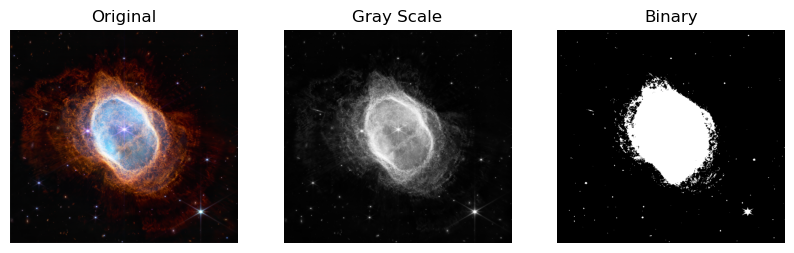

In [59]:
#binarizing the img
threshold_value = filters.threshold_otsu(gray_img)
binary_img = gray_img < threshold_value
print(threshold_value)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray_img, cmap='gray')
plt.title('Gray Scale')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(binary_img, cmap='binary')
plt.title('Binary')
plt.axis('off')

